<a href="https://colab.research.google.com/github/Yogs005/Netflix_Recomender_systems/blob/main/Copy_of_Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import norm
from collections import Counter
from wordcloud import WordCloud
import string
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import operator
import itertools
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from nltk.util import ngrams
import nltk,re,string,gensim
from nltk.corpus import stopwords,wordnet as wn
from gensim import corpora
from nltk.stem import SnowballStemmer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import linear_kernel
from collections import defaultdict
import re
from nltk.stem.porter import *
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
! pip install rake-nltk
from rake_nltk import Rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import io
import math

In [ ]:
net_df=pd.read_csv('/content/drive/MyDrive/Python Data/Netflix/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
net_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
net_df.shape

(7787, 12)

In [ ]:
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


The data has 7787 rows and 12 columns.


In [ ]:
data=net_df.copy()

In [ ]:
df=net_df.copy()

Data cleaning

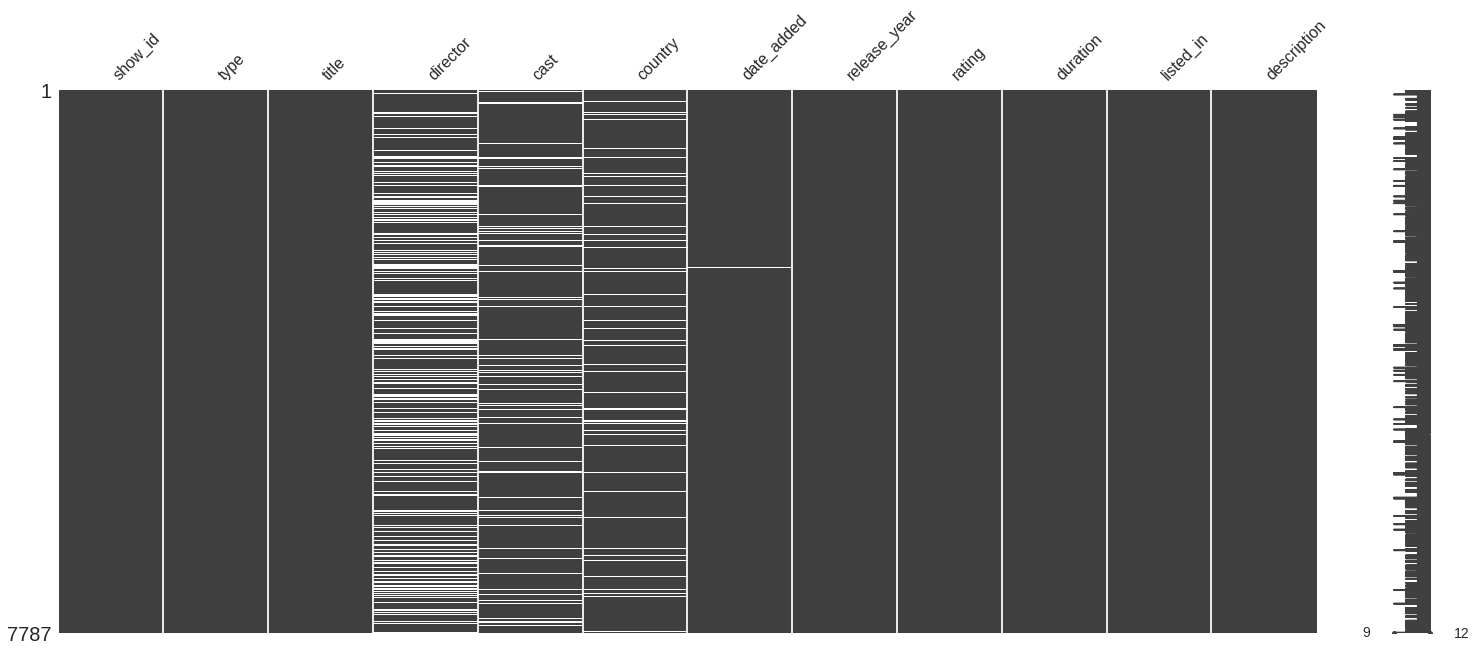

In [ ]:
msno.matrix(net_df);

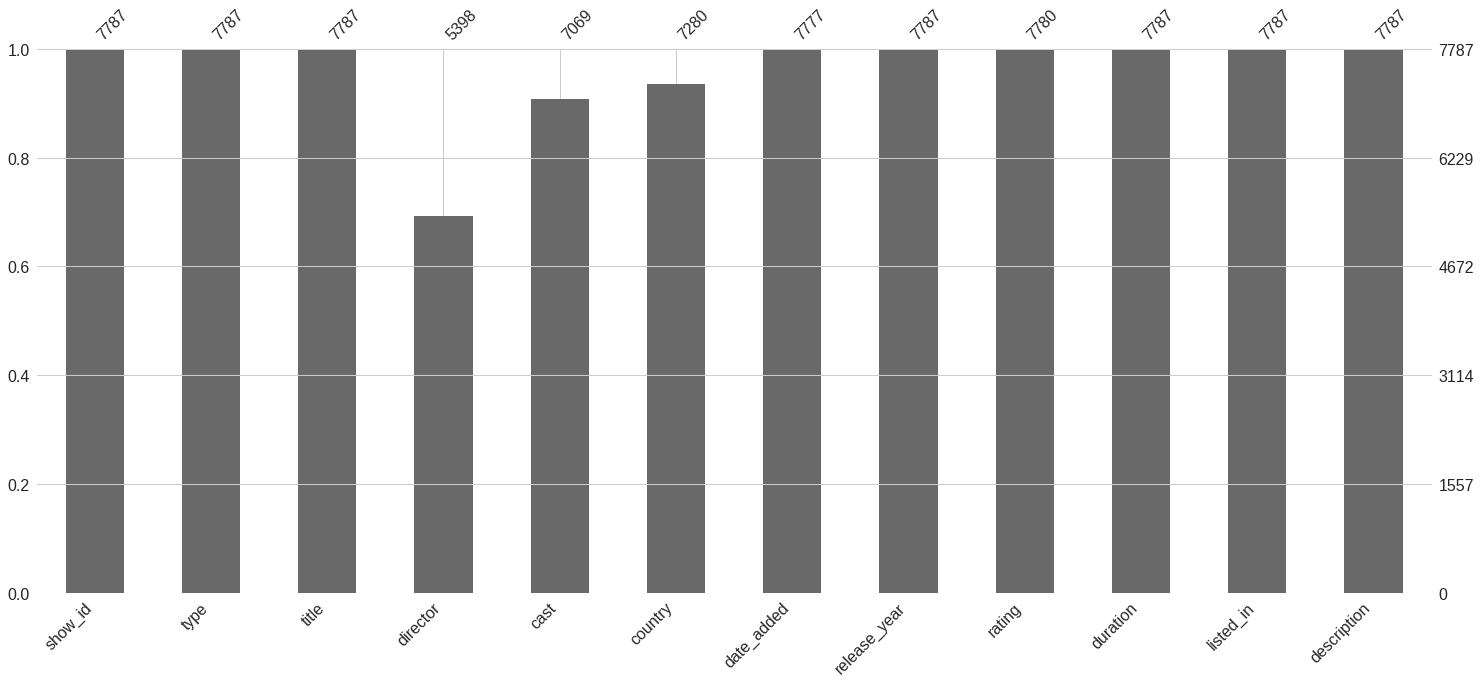

In [ ]:
msno.bar(net_df);

In [ ]:
net_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We can remove director and cast columns as because it has more missing values and this will affect other features.
Other features can be handled easily because they have very less missing values.

In [ ]:
net_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
net_df[net_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


We have manually found the ratings of the missing movies and tv shows and we will replace with ratings what we found

In [ ]:
replace_rating={
    67: 'TV-PG',
    2359:'TV-14',
    3660:'TV-MA',
    3736:'TV-MA',
    3737:'NR',
    3738:'TV-MA',
    4323:'TV-MA'
}

In [ ]:
for i, r in replace_rating.items():
  net_df.iloc[i,8]=r

In [ ]:
net_df['rating'].isna().sum()

0

In [ ]:
#We will drop director and cast features
net_df=net_df.drop(['director','cast'],axis=1)

In [ ]:
net_df.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [ ]:
#we will drop data_added missing data as it is very less of size 10
net_df=net_df[net_df['date_added'].notna()]

In [ ]:
net_df['country']=net_df['country'].fillna(net_df['country'].mode()[0])

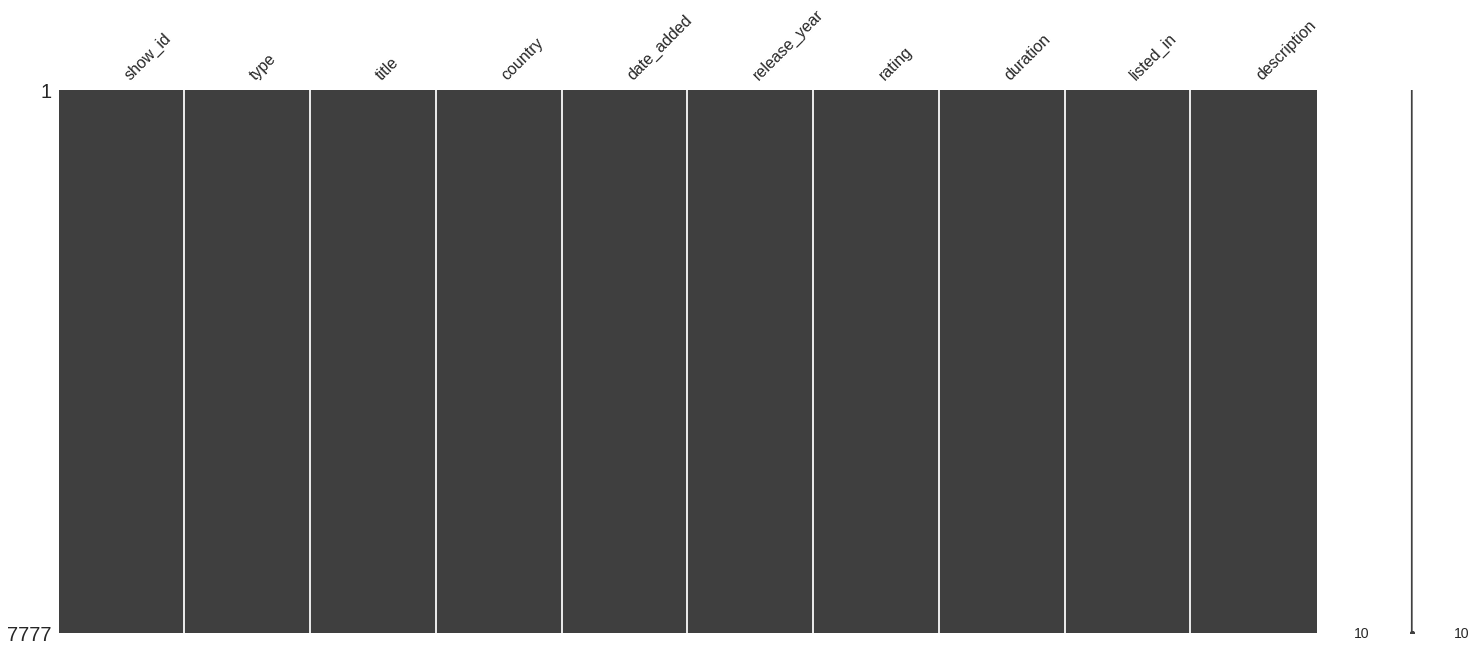

In [ ]:
msno.matrix(net_df);

Here we can see there are not missing data

We will add new features based on date_added

In [ ]:
net_df['date_added']=pd.to_datetime(net_df['date_added'])
net_df['year_added']=net_df['date_added'].dt.year
net_df['month_added']=net_df['date_added'].dt.month

In [ ]:
net_df.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


We fix ratings based on ages

In [ ]:
net_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
rating_cat={
    'TV-MA':'Adults',
    'R':'Adults',
    'PG-13':'Teen',
    'TV-14':'Teen',
    'TV-PG':'7&above',
    'NR':'Adults',
    'TV-G':'Kids',
    'TV-Y':'Kids',
    'TV-Y7':'7&above',
    'PG':'7&above',
    'G':'Kids',
    'NC-17':'Adults',
    'TV-Y7-FV':'7&above',
    'UR':'Adults'
}

In [ ]:
net_df['rating_age']=net_df['rating'].replace(rating_cat)
net_df['rating_age'].nunique()

4

In [ ]:
net_df['rating_age'].unique()

array(['Adults', 'Teen', '7&above', 'Kids'], dtype=object)

Here Country feature has multiple countries, so will seperate and into other new feature

In [ ]:
net_df['principal_country']=net_df['country'].apply(lambda x:x.split(",")[0])

In [ ]:
net_df.tail(10)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,rating_age,principal_country
7777,s7778,TV Show,Zombie Dumb,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,7&above,United States
7778,s7779,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,Adults,United States
7779,s7780,TV Show,Zona Rosa,Mexico,2019-11-26,2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,2019,11,Adults,Mexico
7780,s7781,Movie,Zoo,India,2018-07-01,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,7,Adults,India
7781,s7782,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,7&above,United States
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,Adults,Sweden
7783,s7784,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,Teen,India
7784,s7785,Movie,Zulu Man in Japan,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Adults,United States
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,7&above,Australia
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Adults,United Kingdom


We will create new feature for Genre and add data by spliting from listed_in feature

In [ ]:
net_df['genre']=net_df['listed_in'].apply(lambda x:x.replace(' ,',',').replace(', ',',').split(','))

In [ ]:
net_df.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,rating_age,principal_country,genre
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Adults,Brazil,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Adults,Mexico,"[Dramas, International Movies]"


###Data Visualization

In [ ]:
net_movie=net_df[net_df['type']=='Movie']
net_show=net_df[net_df['type']=='TV Show']

In [ ]:
fig=px.pie(net_df['type'].value_counts().reset_index(),values='type',names='index')
fig.update_traces(textposition='outside',textinfo='percent+label')
fig.show()

In [ ]:
def rating_df(df):
  r_d=df.groupby(['rating','rating_age']).agg({'show_id':'count'}).reset_index()
  r_d=r_d[r_d['show_id']!=0]
  r_d.columns=['rating','rating_age','count']
  r_d=r_d.sort_values('rating_age')
  return r_d

In [ ]:
r_d=rating_df(net_df)
fig=px.bar(r_d,x='rating',y='count',color='rating_age')
fig.show()

In [ ]:
movie_r=rating_df(net_movie)
show_r=rating_df(net_show)

fig=make_subplots(rows=1, cols=2 ,specs=[[{'type':'pie'},{'type':'pie'}]])
fig.add_trace(
    go.Pie(labels=movie_r['rating_age'],values=movie_r['count']),
    row=1,col=1
)
fig.add_trace(
    go.Pie(labels=show_r['rating_age'],values=show_r['count']),
    row=1,col=2
)

fig.update_traces(textposition='inside',hoverinfo="label+percent+name")
fig.update_layout(
    title_text='Rating and count of movies and tv shows',
    annotations=[dict(text='Movies',x=0.2,y=0.1,showarrow=False),
                 dict(text='TV Shows',x=1,y=0.1,showarrow=False)]
)
fig.show()

In [ ]:
country_d=net_df['principal_country'].value_counts().reset_index()
country_d=country_d[country_d['principal_country']/country_d['principal_country'].sum()>0.01]
fig=px.pie(country_d,values='principal_country',names='index')

fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

In [ ]:
fig=px.histogram(net_df,x='principal_country',color='type')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
released_y=net_df.loc[net_df['release_year']].groupby(['release_year','type']).agg({'show_id':'count'}).reset_index()
added_y=net_df.loc[net_df['year_added']].groupby(['year_added','type']).agg({'show_id':'count'}).reset_index()

# fig=go.Figure()
# fig.add_trace(go.Scatter(
#     x=released_y.loc[released_y['type']=='Movie']['release_year'],
#     y=released_y.loc[released_y['type']=='Movie']['show_id'],
#     mode='lines+markers',
#     name='Movie released years',
#     marker_color='cornsilk',
# ))

# fig=go.Figure()
# fig.add_trace(go.Scatter(
#     x=released_y.loc[released_y['type']=='TV Show']['release_year'],
#     y=released_y.loc[released_y['type']=='TV Show']['show_id'],
#     mode='lines+markers',
#     name='TV Show released years',
#     marker_color='coral',
# ))

# fig=go.Figure()
# fig.add_trace(go.Scatter(
#     x=added_y.loc[added_y['type']=='Movie']['year_added'],
#     y=added_y.loc[added_y['type']=='Movie']['show_id'],
#     mode='lines+markers',
#     name='Movie year added',
#     marker_color='crimson',
# ))

# fig=go.Figure()
# fig.add_trace(go.Scatter(
#     x=added_y.loc[added_y['type']=='TV Show']['year_added'],
#     y=added_y.loc[added_y['type']=='TV Show']['show_id'],
#     mode='lines+markers',
#     name='TV Show year added',
#     marker_color='orange',
# ))

# fig.update_xaxes(categoryorder='total descending')
# fig.show()

In [ ]:
released_y.head(5)

,release_year,type,show_id
0,1971,Movie,2
1,1973,Movie,266
2,1996,Movie,85
3,2002,Movie,1153
4,2006,Movie,34


In [ ]:
added_y.head(5)

,year_added,type,show_id
0,2017,Movie,27
1,2017,TV Show,1226
2,2018,Movie,456
3,2018,TV Show,88
4,2019,Movie,1688


In [ ]:
# released_y_temp=released_y['released_year'].value_counts().reset_index()
# added_y_temp=added_y['added_year'].value_counts().reset_index()

movie_release=net_df[net_df['type']=='Movie']
tvshow_release=net_df[net_df['type']=='TV Show']

temp1=movie_release['release_year'].value_counts().reset_index()
temp2=tvshow_release['release_year'].value_counts().reset_index()
t1=go.Bar(
    x=temp1['index'],
    y=temp1['release_year'],
    name='Movies',
    marker=dict(color='cornsilk')
)

t2=go.Bar(
    x=temp2['index'],
    y=temp2['release_year'],
    name='TV Shows',
    marker=dict(color='aqua')
)

layout=go.Layout(template='plotly_dark',title='Movies and Tv shows released over the years',xaxis=dict(title='year'),yaxis=dict(title='Count'))
fig= go.Figure(data=[t1,t2],layout=layout)
fig.show()

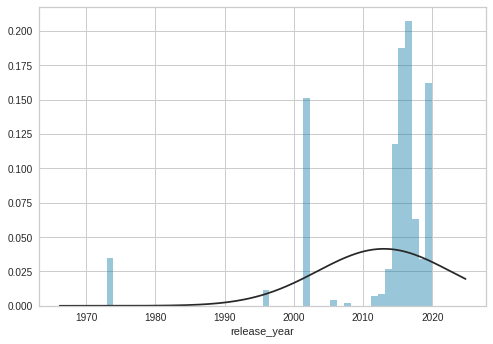

In [ ]:
sns.distplot(net_df.loc[net_df['release_year'],'release_year'],fit=norm,kde=False)

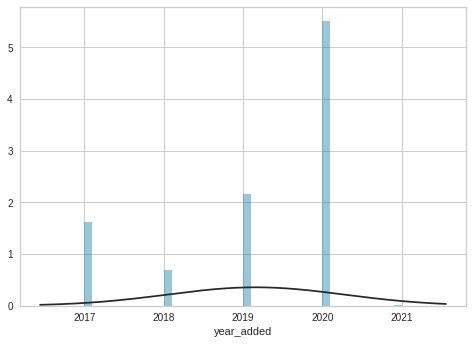

In [ ]:
sns.distplot(net_df.loc[net_df['year_added'],'year_added'],fit=norm,kde=False)

In [ ]:
movie_df=net_df[net_df['type']=='Movie']
tv_df=net_df[net_df['type']=='TV Show']

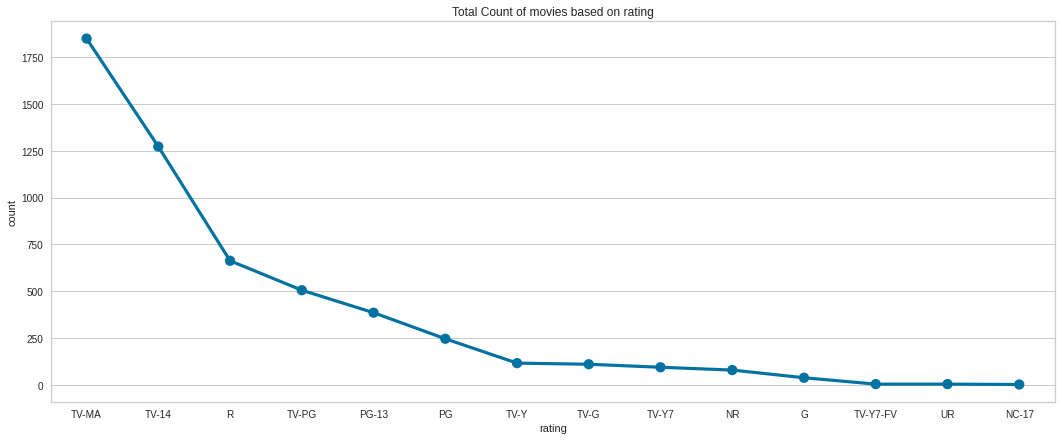

In [ ]:
rating_movie=movie_df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig,ax=plt.subplots(figsize=(18,7))
sns.pointplot(x='rating',y='count',data=rating_movie)
plt.title('Total Count of movies based on rating')
plt.show()

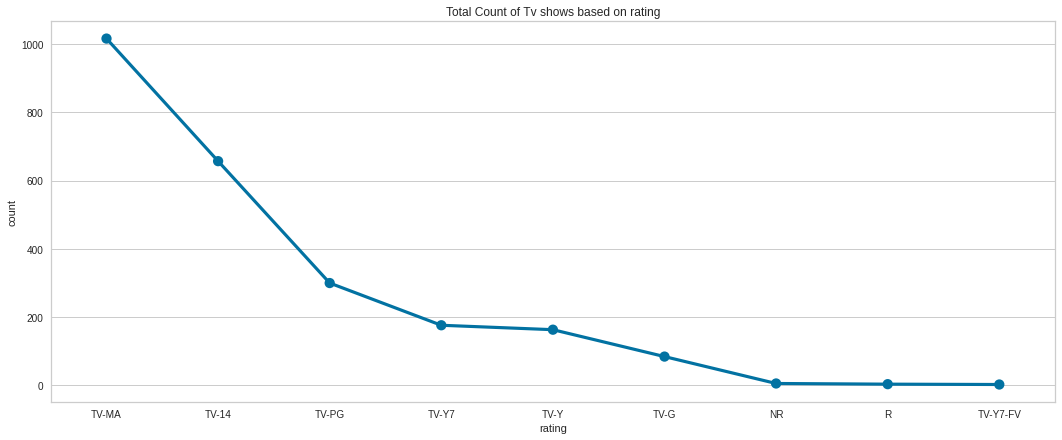

In [ ]:
rating_tv=tv_df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig,ax=plt.subplots(figsize=(18,7))
sns.pointplot(x='rating',y='count',data=rating_tv)
plt.title('Total Count of Tv shows based on rating')
plt.show()

In [ ]:
fig=px.histogram(x=tv_df['duration'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(title='Duration of Tv Shows')
fig.show()

###Top genres in movies and tv Shows

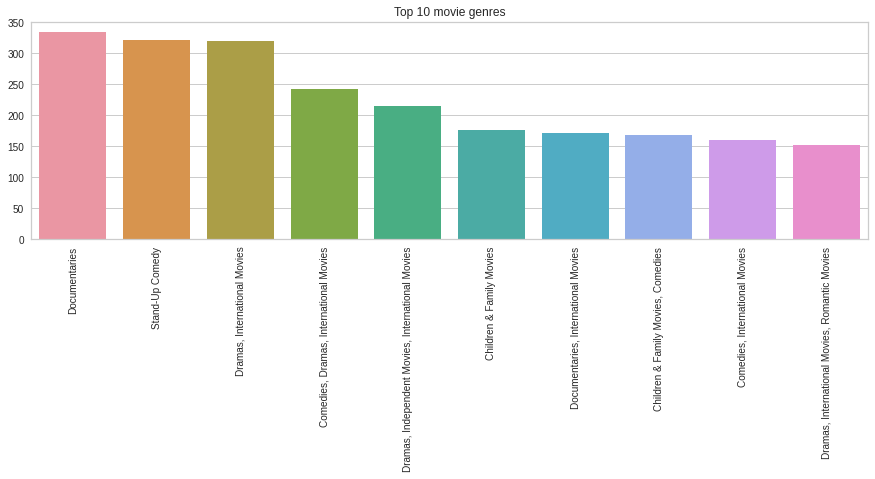

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(x=movie_df['listed_in'].value_counts().head(10).index,y=movie_df['listed_in'].value_counts().head(10).values)
plt.title('Top 10 movie genres')
plt.xticks(rotation=90)
plt.show()

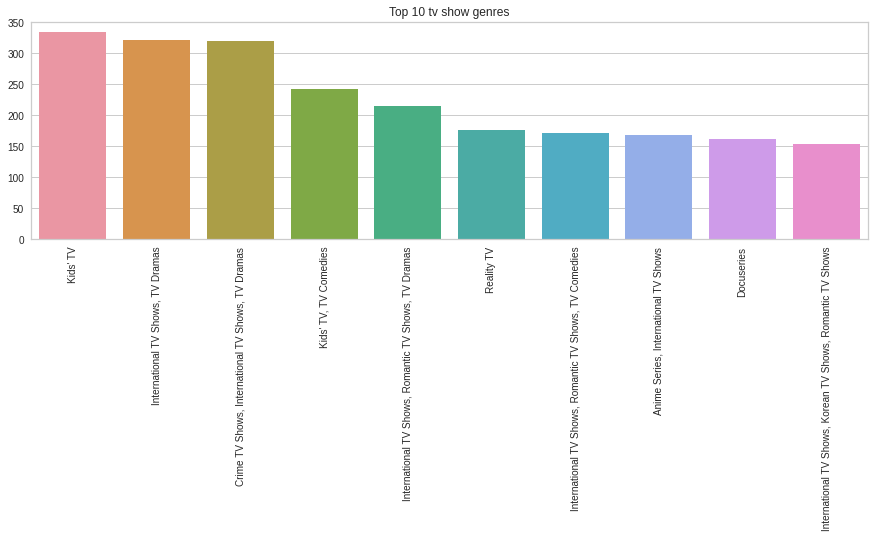

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(x=tv_df['listed_in'].value_counts().head(10).index,y=movie_df['listed_in'].value_counts().head(10).values)
plt.title('Top 10 tv show genres')
plt.xticks(rotation=90)
plt.show()

###Countries producing more content

In [ ]:
country_c=pd.Series(dict(Counter(net_df['principal_country']))).sort_values(ascending=False)
top_country=country_c.head(20)

In [ ]:
top_country.head(20)

United States     3383
India              956
United Kingdom     576
Canada             259
Japan              236
France             196
South Korea        194
Spain              168
Mexico             123
Australia          107
Turkey             106
Egypt              105
Germany             92
China               86
Taiwan              82
Brazil              79
Hong Kong           77
Indonesia           76
Philippines         75
Nigeria             71
dtype: int64

In [ ]:
t1=go.Bar(
    x=top_country.index,
    y=top_country,
    marker=dict(color='aqua')
)
layout=go.Layout(template='plotly_dark',title='Top content producing Countries',xaxis=dict(title='Countries'),yaxis=dict(title='Count'))
fig= go.Figure(data=[t1],layout=layout)
fig.show()


Word Cloud

###Word Cloud for movie genre

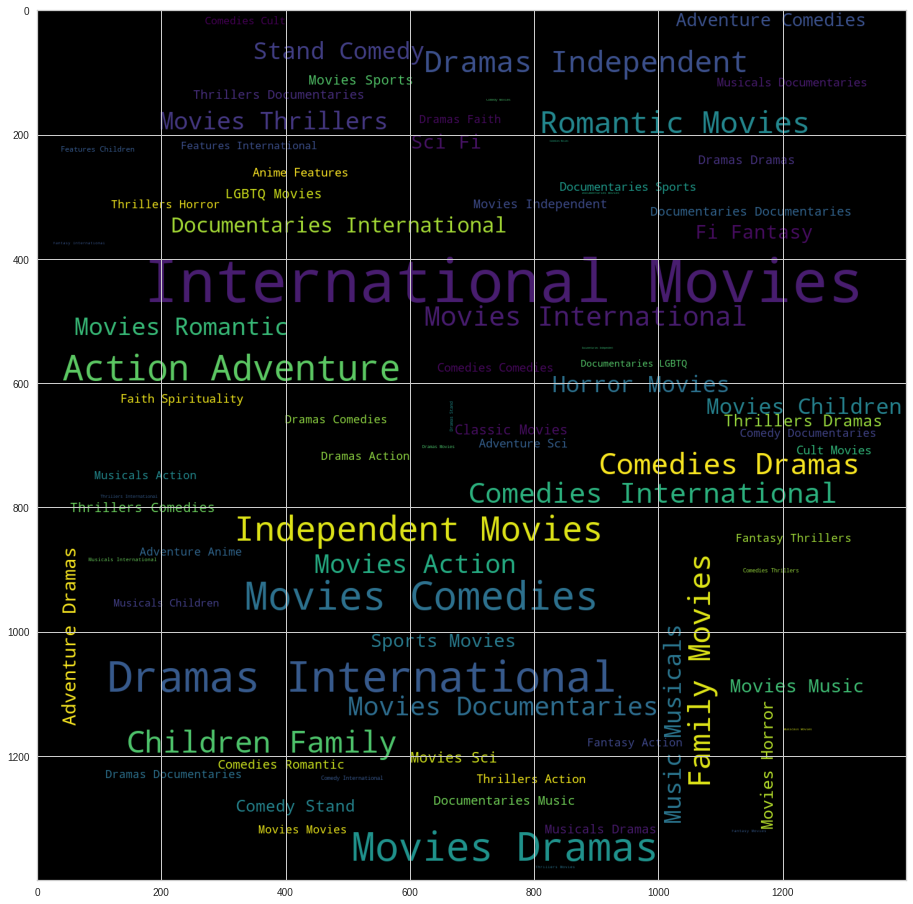

In [ ]:
words=str(list(movie_df['genre'])).replace(',','').replace("'",'').replace('[','').replace(']','')
plt.rcParams['figure.figsize']=(16,16)
wc=WordCloud(background_color='black',width=1400,height=1400,max_words=123).generate(words)
plt.imshow(wc)
plt.show()

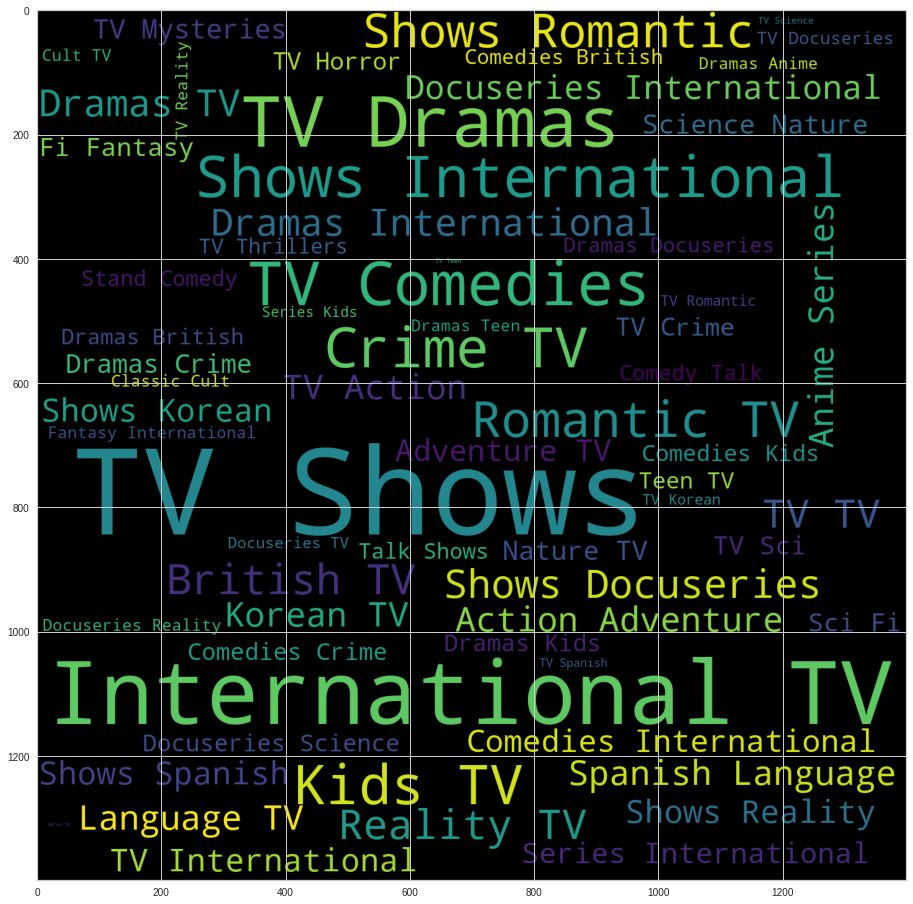

In [ ]:
words=str(list(tv_df['genre'])).replace(',','').replace("'",'').replace('[','').replace(']','')
plt.rcParams['figure.figsize']=(16,16)
wc=WordCloud(background_color='black',width=1400,height=1400,max_words=123).generate(words)
plt.imshow(wc)
plt.show()

In [ ]:
fig=px.histogram(x=tv_df['duration'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
    title='Tv Shows duration',
    xaxis_title='Seasons'
)
fig.show()

###Analsysis on movie duration
Here we will split duration of movies into three categories

*   Duration of less than 1:30 hours
*   Between 1:30 to 2:30 hours
*   More than 2:30 hours





In [ ]:
movie_duration=movie_df['duration'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
movie_df.loc[movie_duration.loc[movie_duration<90].index, 'split_duration']='less than 1:30 hours'
movie_df.loc[movie_duration.loc[(movie_duration>=90)&(movie_duration<150)].index, 'split_duration']='Between 1:30 and 2:30 hours'
movie_df.loc[movie_duration.loc[(movie_duration>=150)].index, 'split_duration']='More than 2:30 hours'
movie_df.head(5)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,rating_age,principal_country,genre,split_duration
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Adults,Mexico,"[Dramas, International Movies]",Between 1:30 and 2:30 hours
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,Adults,Singapore,"[Horror Movies, International Movies]",less than 1:30 hours
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,Teen,United States,"[Action & Adventure, Independent Movies, Sci-F...",less than 1:30 hours
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,Teen,United States,[Dramas],Between 1:30 and 2:30 hours
6,s7,Movie,122,Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,Adults,Egypt,"[Horror Movies, International Movies]",Between 1:30 and 2:30 hours


In [ ]:
fig=px.histogram(x=movie_df['split_duration'],color=movie_df['split_duration'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
    title='Movie Duration'
)
fig.show()

###Performing nltk operations on description feature

In [ ]:
net_df.listed_in=net_df.listed_in.str.split(',').tolist()

In [ ]:
net_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'year_added',
       'month_added', 'rating_age', 'principal_country', 'genre'],
      dtype='object')

In [ ]:
net_df['new_feature']=net_df['listed_in'].astype(str)+""+net_df['description'].astype(str)+""+net_df['type'].astype(str)+""+net_df['principal_country'].astype(str)+""+net_df['rating'].astype(str)

In [ ]:
net_df['new_feature']=net_df['new_feature'].apply(lambda word: re.sub('https?://A-Za-z0-9./]+','',str(word)))
net_df['new_feature']=net_df['new_feature'].apply(lambda word: re.sub('[^a-zA-Z]','',str(word)))
net_df['new_feature']=net_df['new_feature'].apply(lambda word: word.lower())

In [ ]:
net_df['listed_in']=net_df['listed_in'].apply(lambda word: re.sub('https?://A-Za-z0-9./]+','',str(word)))
net_df['listed_in']=net_df['listed_in'].apply(lambda word: re.sub('[^a-zA-Z]','',str(word)))
net_df['listed_in']=net_df['new_feature'].apply(lambda word: word.lower())

In [ ]:
net_df['decription']=net_df['description'].apply(lambda word: re.sub('https?://A-Za-z0-9./]+','',str(word)))
net_df['description']=net_df['description'].apply(lambda word: re.sub('[^a-zA-Z]','',str(word)))
net_df['description']=net_df['description'].apply(lambda word: word.lower())

In [ ]:
net_df['country']=net_df['country'].apply(lambda word: re.sub('https?://A-Za-z0-9./]+','',str(word)))
net_df['country']=net_df['country'].apply(lambda word: re.sub('[^a-zA-Z]','',str(word)))
net_df['country']=net_df['country'].apply(lambda word: word.lower())

Stopwords removal

In [ ]:
stop_words=set(stopwords.words('english'))

def stop(words):
  words=[w for w in words.split() if words.lower() not in stop_words]
  return words

net_df['new_feature']=net_df['new_feature'].apply(lambda x: stop(x))
net_df['listed_in']=net_df['listed_in'].apply(lambda x: stop(x))
net_df['description']=net_df['description'].apply(lambda x: stop(x))
net_df['country']=net_df['country'].apply(lambda x: stop(x))


In [ ]:
net_df.head(5)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,rating_age,principal_country,genre,new_feature,decription
0,s1,TV Show,3%,[brazil],2020-08-14,2020,TV-MA,4 Seasons,[internationaltvshowstvdramastvscififantasyina...,[inafuturewheretheeliteinhabitanislandparadise...,2020,8,Adults,Brazil,"[International TV Shows, TV Dramas, TV Sci-Fi ...",[internationaltvshowstvdramastvscififantasyina...,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,[mexico],2016-12-23,2016,TV-MA,93 min,[dramasinternationalmoviesafteradevastatingear...,[afteradevastatingearthquakehitsmexicocitytrap...,2016,12,Adults,Mexico,"[Dramas, International Movies]",[dramasinternationalmoviesafteradevastatingear...,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,[singapore],2018-12-20,2011,R,78 min,[horrormoviesinternationalmovieswhenanarmyrecr...,[whenanarmyrecruitisfounddeadhisfellowsoldiers...,2018,12,Adults,Singapore,"[Horror Movies, International Movies]",[horrormoviesinternationalmovieswhenanarmyrecr...,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,[unitedstates],2017-11-16,2009,PG-13,80 min,[actionadventureindependentmoviesscififantasyi...,[inapostapocalypticworldragdollrobotshideinfea...,2017,11,Teen,United States,"[Action & Adventure, Independent Movies, Sci-F...",[actionadventureindependentmoviesscififantasyi...,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,[unitedstates],2020-01-01,2008,PG-13,123 min,[dramasabrilliantgroupofstudentsbecomecardcoun...,[abrilliantgroupofstudentsbecomecardcountingex...,2020,1,Teen,United States,[Dramas],[dramasabrilliantgroupofstudentsbecomecardcoun...,A brilliant group of students become card-coun...


Stemming

In [ ]:
stemm=PorterStemmer()

def stem_words(words):
  words=[stemm.stem(w) for w in words]
  return (' '.join(words))

net_df['new_feature']=net_df['new_feature'].apply(lambda x: stem_words(x))
net_df['description']=net_df['description'].apply(lambda x: stem_words(x))
net_df['listed_in']=net_df['listed_in'].apply(lambda x: stem_words(x))
net_df['country']=net_df['country'].apply(lambda x: stem_words(x))

Finding lengths of features and storing in new features for clustering

In [ ]:
def length(text):
  return len(text)
net_df['listedin_len']=net_df['listed_in'].apply(length)
net_df['description_len']=net_df['description'].apply(length)
net_df['country_len']=net_df['country'].apply(length)

Standard Scaler

In [ ]:
x_len=net_df[['listedin_len','description_len','country_len']]

In [ ]:
x_len.head()

,listedin_len,description_len,country_len
0,165,107,6
1,163,120,6
2,167,123,8
3,182,119,8
4,145,120,8


In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(x_len)

In [ ]:
X

array([[ 0.16421069, -0.94309792, -0.55791734],
       [ 0.02542928,  0.50224979, -0.55791734],
       [ 0.30299209,  0.83579157, -0.23832664],
       ...,
       [ 1.62141545,  0.3910692 , -0.23832664],
       [-0.04396142, -0.49837555, -0.07853129],
       [ 0.23360139,  0.2798886 ,  2.79778504]])

**KMeans**

In [ ]:
cluster_size=[i for i in range(2,100,10)]
silhouetteaverage=[]
sum_sqr_distance=[]

for i in cluster_size:
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  clust_label=kmeans.labels_
  silhouetteaverage.append(silhouette_score(X,clust_label))
  sum_sqr_distance.append(kmeans.inertia_)


Silhouette Sore and plot

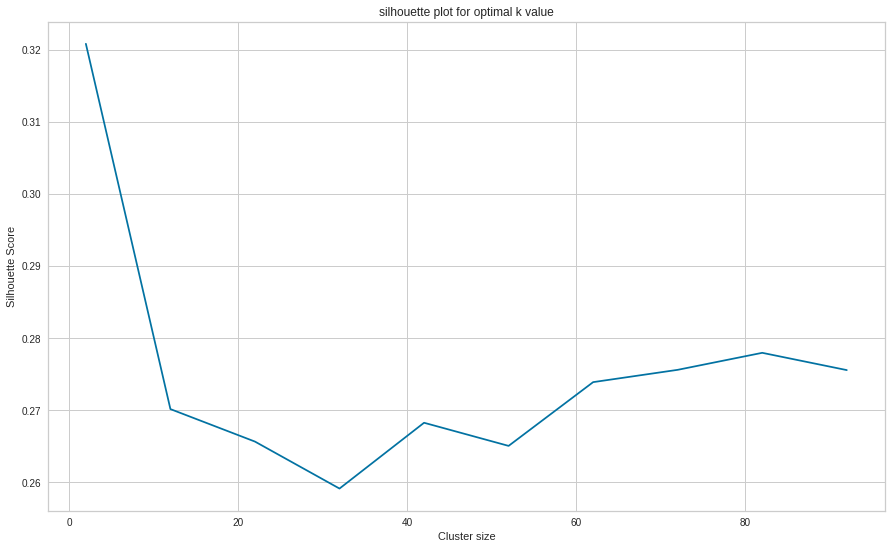

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(cluster_size,silhouetteaverage)
plt.xlabel('Cluster size')
plt.ylabel('Silhouette Score')
plt.title('silhouette plot for optimal k value')
plt.show()

Elbow plot

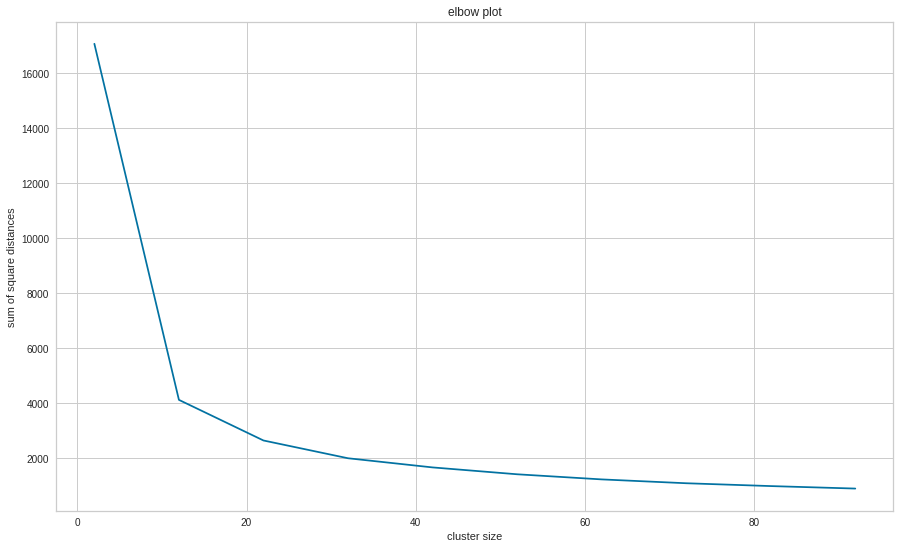

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(cluster_size,sum_sqr_distance)
plt.title('elbow plot')
plt.xlabel('cluster size')
plt.ylabel('sum of square distances')
plt.show()

Here we can see from both silhouette and elbow plot optimal clusters are 22

In [ ]:
kmeans=KMeans(n_clusters=22)
label=kmeans.fit_predict(X)

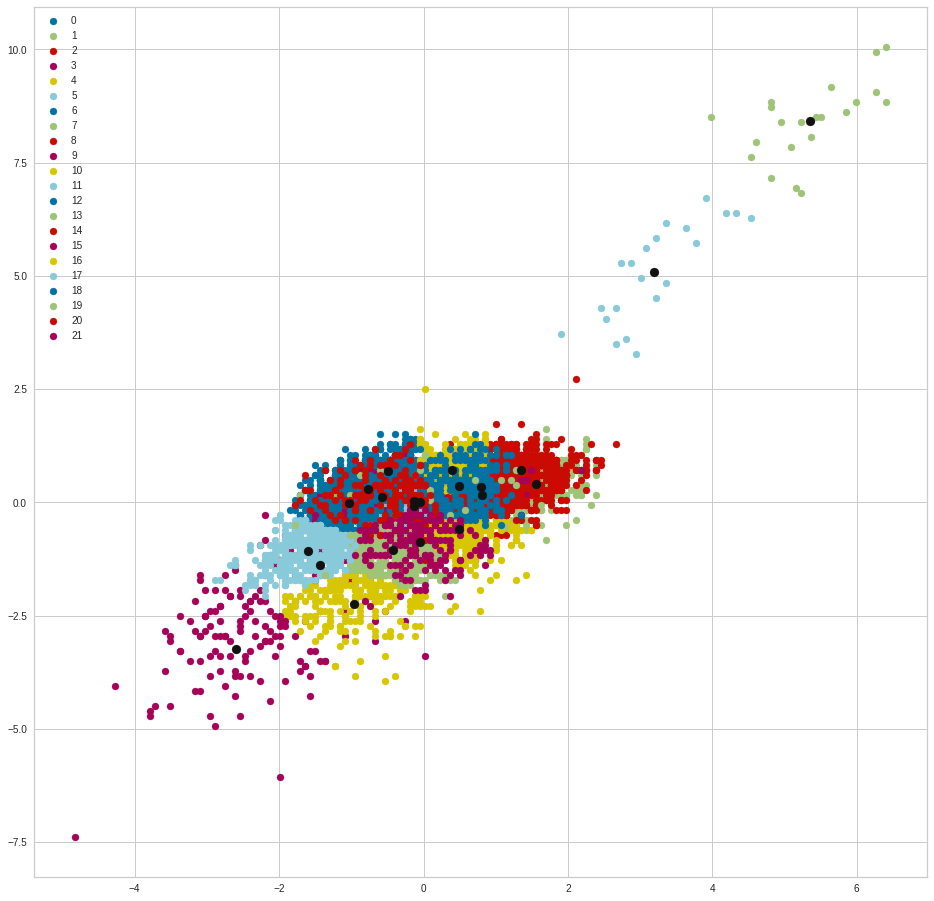

In [ ]:
centroids=kmeans.cluster_centers_
labels=np.unique(label)
# plotting clusters
for i in labels:
  plt.scatter(X[label==i,0],X[label==i,1],label=i)
plt.scatter(centroids[:,0],centroids[:,1],s=80,color='k')
plt.legend()
plt.show()

In [ ]:
net_df[['title','description']].head(5)

,title,description
0,3%,inafuturewheretheeliteinhabitanislandparadisef...
1,7:19,afteradevastatingearthquakehitsmexicocitytrapp...
2,23:59,whenanarmyrecruitisfounddeadhisfellowsoldiersa...
3,9,inapostapocalypticworldragdollrobotshideinfear...
4,21,abrilliantgroupofstudentsbecomecardcountingexp...


Recommender System

Recommender system using cosine similarity

In [ ]:
ori_len=len(data)
drop_df=data.dropna()
drop_len=len(drop_df)
data=drop_df

In [ ]:
data.drop(columns=['show_id','date_added','duration','description'],inplace=True)

###Bag of Words

In [ ]:
data['country']=data['country'].map(lambda x: x.split(',')[0])
bag_of_words=['director','cast','listed_in']

for col in bag_of_words:
  data[col]=data[col].map(lambda x: x.lower().replace(' ','').split(',')[:3])

data['bow']=''
for i,row in data.iterrows():
  words=[' '.join(row[col]) for col in bag_of_words]
  data.loc[i,'bow']=' '.join(words)

data.drop(columns=bag_of_words, inplace=True)
data.head(5)

,type,title,country,release_year,rating,bow
1,Movie,7:19,Mexico,2016,TV-MA,jorgemichelgrau demiánbichir héctorbonilla osc...
2,Movie,23:59,Singapore,2011,R,gilbertchan teddchan stellachung henleyhii hor...
3,Movie,9,United States,2009,PG-13,shaneacker elijahwood johnc.reilly jennifercon...
4,Movie,21,United States,2008,PG-13,robertluketic jimsturgess kevinspacey katebosw...
5,TV Show,46,Turkey,2016,TV-MA,serdarakar erdalbeşikçioğlu yaseminallen melis...


In [ ]:
data= pd.get_dummies(data,columns=['type','rating','country'])
data.reset_index(drop=True,inplace=True)

###CountVectorizer

In [ ]:
vector=CountVectorizer()
matrix=vector.fit_transform(data['bow'])

sim=cosine_similarity(matrix,matrix)
dis_sim=1-sim

Here we calculate Euclidean distance for cosine similarities

In [ ]:
def euclidean_distance(row1,row2, release_weighting=0.1):
  row1_feat=np.array([row1[col] for col in data.columns if col !='title' and col != 'bow' and col !='release_year'])
  row1_feat=row1_feat.astype(np.int16)
  row2_feat=np.array([row2[col] for col in data.columns if col !='title' and col !='bow' and col !='release_year'])
  row2_feat=row2_feat.astype(np.int16)
  diff=np.subtract(row1_feat,row2_feat)

  release_year_diff=release_weighting*(row1['release_year']-row2['release_year'])
  diff=np.append(diff,[release_year_diff])

  return math.sqrt(np.sum([d**2 for d in diff]))

def total_distance(row1_index, row2_index, bag_of_words_weight=2):
  row1=data.iloc[row1_index]
  row2=data.iloc[row2_index]
  distance=euclidean_distance(row1,row2)
  distance+= bag_of_words_weight*dis_sim[row1_index][row2_index]
  return distance

The below is the recommendation function, where it takes title calculates the distances and finds the nearest recommendations for a given title

In [ ]:
def recommend(title, total_recommendations=10):
  titles=data['title']
  title_instance=titles[titles==title]
  if title_instance.empty:
    print('Please Provide valid title')
    return
  current_index=titles[titles==title].index[0]

  distance=list()
  for i, row in data.iterrows():
    distance.append((row,total_distance(current_index, i)))
  distance.sort(key=lambda t: t[1])
  results=list(map(lambda t: t[0]['title'],distance[1:total_recommendations+1]))
  print('Recommendations for the'+title)
  for res in results:
    print(res)
  print()

In [ ]:
recommend("Zombieland")

Recommendations for theZombieland
30 Minutes or Less
Friday the 13th
Road Trip: Beer Pong
The Goods: Live Hard, Sell Hard
The Men Who Stare at Goats
Case 39
The Final Destination
The Informant!
The Ugly Truth
A Serious Man



The above are the recommendations for the given title

In [ ]:
data['title'].tail(20)

4788    Zach Galifianakis: Live at the Purple Onion
4789                     Zack and Miri Make a Porno
4790                                      Zaki Chan
4791                                         Zapped
4792                                       Zed Plus
4793                                          Zenda
4794                                           Zero
4795                       Zindagi Kitni Haseen Hay
4796                       Zindagi Na Milegi Dobara
4797                                        Zinzana
4798                                           Zion
4799              Zipi & Zape y la Isla del Capitan
4800                                 Zoé: Panoramas
4801                                         Zodiac
4802                                       Zokkomon
4803                                     Zombieland
4804                                            Zoo
4805                                           Zoom
4806                                           Zozo
4807        

###Conclusion

* The above Netflix data has both movies 
and tv shows.
* There were several missing data and we have handled the missing data.
* We have visualised using several plots and found several insigths from the data.
* We have processed the text data using nltk library.
* We have porterstemmer standardscaler for processing the data.
* We have used KMeans for clustering data, we found that optimal clusters for this data is 22 which is found using silhouette method and elbow plot.
* We have used Cosine_similarity to build a recommender system.
